Participate in the design of an autonomous car
----------------

Download the Cityscapes dataset from https://www.cityscapes-dataset.com/dataset-overview/. We only download the folders gtFine_trainvaltest.zip and leftImg8bit_trainvaltest.zip.

#### In this notebook we will create the folders Test-Train-Val  from the cityscapes dataset and do some Exploratory data analysis on it.

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import os
import shutil
import matplotlib.pyplot as plt
import cv2
from collections import namedtuple, Counter
from tqdm import tqdm
from imgaug import augmenters as iaa
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib import colors
import random
%matplotlib inline

### We will not use the test set as it has no mask in it

In [2]:
# Set origin folders
train_image_dir = 'leftImg8bit_trainvaltest/leftImg8bit/train/*/*.png'
train_mask_dir = 'gtFine_trainvaltest/gtFine/train/*/*_labelIds.png'
val_image_dir = 'leftImg8bit_trainvaltest/leftImg8bit/val/*/*.png'
val_mask_dir = 'gtFine_trainvaltest/gtFine/val/*/*_labelIds.png'

In [3]:
# Set final destination folders
train_input_dir = 'train/images'
train_masks30_dir = 'train/masks30'
test_input_dir = 'test/images'
test_masks30_dir = 'test/masks30'

In [4]:
# Function to move file from origin to destination path
def move_files(origin, destination):
    # Check if origin is directory or list
    if isinstance(origin, list):
        origin_fname = origin
    else :
        origin_fname = glob(origin)
    
    for file in origin_fname:
        shutil.move(file, destination)

In [5]:
move_files(train_image_dir, train_input_dir)
move_files(train_mask_dir, train_masks30_dir)
move_files(val_image_dir, test_input_dir)
move_files(val_mask_dir, test_masks30_dir)

In [6]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_masks30_dir)), '- 1st file name: ', sorted(os.listdir(train_masks30_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_masks30_dir)), '- 1st file name: ', sorted(os.listdir(test_masks30_dir))[0])

Train Images Count:  2975 - 1st file name:  aachen_000000_000019_leftImg8bit.png
Train Masks Count:  2975 - 1st file name:  aachen_000000_000019_gtFine_labelIds.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294_leftImg8bit.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294_gtFine_labelIds.png


### Remove the leftImg8bit and gtFine from the above image names

In [7]:
# Create a function to rename files
def rename_file(path, is_mask=False):
    """ Provide path of file to be renamed
    """
    # Create a list of file
    file_list = np.array(os.listdir(path))

    # Iterate over the filelist
    for filename in file_list:
        if is_mask == True:
            dest = filename.split('_gtFine_labelIds')[0]+'.png'
        else:
            dest = filename.split('_leftImg8bit')[0]+'.png'

        src = path + '/' + filename
        dest = path + '/' + dest
        os.rename(src, dest)

In [8]:
# Call the function
rename_file(train_input_dir, is_mask=False)
rename_file(train_masks30_dir, is_mask=True)
rename_file(test_input_dir, is_mask=False)
rename_file(test_masks30_dir, is_mask=True)

In [9]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_masks30_dir)), '- 1st file name: ', sorted(os.listdir(train_masks30_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_masks30_dir)), '- 1st file name: ', sorted(os.listdir(test_masks30_dir))[0])

Train Images Count:  2975 - 1st file name:  aachen_000000_000019.png
Train Masks Count:  2975 - 1st file name:  aachen_000000_000019.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294.png


### Let us create the Validation dataset

In [10]:
val_input_dir = 'val/images'
val_masks30_dir = 'val/masks30'

In [11]:
# Sort the images and masks of Train dataset
train_input_fname = sorted(
    [os.path.join(
        train_input_dir, fname) for fname in os.listdir(train_input_dir)])

train_target_fname = sorted(
    [os.path.join(
        train_masks30_dir, fname) for fname in os.listdir(train_masks30_dir)])

In [12]:
# Split into train and validation data
val_input_path = train_input_fname[2400:]
val_target_path = train_target_fname[2400:]

In [13]:
move_files(val_input_path, val_input_dir)
move_files(val_target_path, val_masks30_dir)

In [14]:
print('Val Images Count: ', len(os.listdir(val_input_dir)), '- 1st file name: ', sorted(os.listdir(val_input_dir))[0])
print('Val Masks Count: ', len(os.listdir(val_masks30_dir)), '- 1st file name: ', sorted(os.listdir(val_masks30_dir))[0])

Val Images Count:  575 - 1st file name:  stuttgart_000124_000019.png
Val Masks Count:  575 - 1st file name:  stuttgart_000124_000019.png


In [15]:
print('Train Images Count: ', len(os.listdir(train_input_dir)), '- 1st file name: ', sorted(os.listdir(train_input_dir))[0])
print('Train Masks Count: ', len(os.listdir(train_masks30_dir)), '- 1st file name: ', sorted(os.listdir(train_masks30_dir))[0])
print('Test Images Count: ', len(os.listdir(test_input_dir)), '- 1st file name: ', sorted(os.listdir(test_input_dir))[0])
print('Test Masks Count: ', len(os.listdir(test_masks30_dir)), '- 1st file name: ', sorted(os.listdir(test_masks30_dir))[0])

Train Images Count:  2400 - 1st file name:  aachen_000000_000019.png
Train Masks Count:  2400 - 1st file name:  aachen_000000_000019.png
Test Images Count:  500 - 1st file name:  frankfurt_000000_000294.png
Test Masks Count:  500 - 1st file name:  frankfurt_000000_000294.png


* train_input_dir= 2400 images in the train directory 

* train_masks30_dir= 2400 masks in 30 cats in the train directory


* val_input_dir= 575 images in the val directory

* val_masks30_dir= 575 masks in in 30 cats the val directory



* test_input_dir= 500 images in the test directory

* test_masks30_dir= 500 masks in 30 cats in the test directory

### In fact, there are 2400 images in the train dataset, 575 in the val dataset, and 500 images in the test dataset.

### Process to create the mask in 8 categories from 30 ids.

In [16]:
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name the 30 classes

    'id'          , # An integer ID that is associated with this label.

    'categoryId'       , # IDs of labels which match to pixel values
                    # corresponding to the 8 main categories.

    'category'    , # The name of the category that this label belongs to
    ] )

In [17]:
# Create tuple subclasses with named fields
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name the 30 classes

    'id'          , # An integer ID that is associated with this label.

    'categoryId'       , # IDs of labels which match to pixel values
                    # corresponding to the 8 main categories.

    'category'    , # The name of the category that this label belongs to
    ] )

#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

labels = [
    #name                             id    catId   category
    Label(  'unlabeled'            ,  0 ,      0 , 'void'),
    Label(  'ego vehicle'          ,  1 ,      0 , 'void'),
    Label(  'rectification border' ,  2 ,      0 , 'void'),
    Label(  'out of roi'           ,  3 ,      0 , 'void'),
    Label(  'static'               ,  4 ,      0 , 'void'),
    Label(  'dynamic'              ,  5 ,      0 , 'void'),
    Label(  'ground'               ,  6 ,      0 , 'void'),
    Label(  'road'                 ,  7 ,      1 , 'flat'),
    Label(  'sidewalk'             ,  8 ,      1 , 'flat'),
    Label(  'parking'              ,  9 ,      1 , 'flat'),
    Label(  'rail track'           , 10 ,      1 , 'flat'),
    Label(  'building'             , 11 ,      2 , 'construction'),
    Label(  'wall'                 , 12 ,      2 , 'construction'),
    Label(  'fence'                , 13 ,      2 , 'construction'),
    Label(  'guard rail'           , 14 ,      2 , 'construction'),
    Label(  'bridge'               , 15 ,      2 , 'construction'),
    Label(  'tunnel'               , 16 ,      2 , 'construction'),
    Label(  'pole'                 , 17 ,      3 , 'object'),
    Label(  'polegroup'            , 18 ,      3 , 'object'),
    Label(  'traffic light'        , 19 ,      3 , 'object'),
    Label(  'traffic sign'         , 20 ,      3 , 'object'),
    Label(  'vegetation'           , 21 ,      4 , 'nature'),
    Label(  'terrain'              , 22 ,      4 , 'nature'),
    Label(  'sky'                  , 23 ,      5 , 'sky'),
    Label(  'person'               , 24 ,      6 , 'human'),
    Label(  'rider'                , 25 ,      6 , 'human'),
    Label(  'car'                  , 26 ,      7 , 'vehicle'),
    Label(  'truck'                , 27 ,      7 , 'vehicle'),
    Label(  'bus'                  , 28 ,      7 , 'vehicle'),
    Label(  'caravan'              , 29 ,      7 , 'vehicle'),
    Label(  'trailer'              , 30 ,      7 , 'vehicle'),
    Label(  'train'                , 31 ,      7 , 'vehicle'),
    Label(  'motorcycle'           , 32 ,      7 , 'vehicle'),
    Label(  'bicycle'              , 33 ,      7 , 'vehicle'),
    Label(  'license plate'        , -1 ,      7 , 'vehicle')]

In [18]:
# Function to map the labels and categories
def map_id2category(labels):
    """ This function maps the ~30 labels' IDs
        to the 8 main categories' IDs
    """
    cat_label = {label.id: label.categoryId for label in labels}
    
    # Get the mapping
    map_category = np.vectorize(cat_label.get)
    return map_category

In [19]:
def old_to_new_mask(img_path, mask30_path, mask8_path, labels):
    # Create lists
    img_list = os.listdir(img_path)
    mask30_list = os.listdir(mask30_path)

    # Sort list
    img_list.sort()
    mask30_list.sort()

    for i in range(0, len(img_list)):
        # Read images and masks
        img = cv2.imread(f'{img_path}/{img_list[i]}')/255
        mask30 = cv2.imread(f'{mask30_path}/{mask30_list[i]}', 
                           cv2.IMREAD_GRAYSCALE)
        
        # Convert masks30 to masks8 (masks)
        map_category = map_id2category(labels)
        mask8 = map_category(mask30)

        # Save new masks on disk
        cv2.imwrite(f'{mask8_path}/{mask30_list[i]}', mask8)

In [20]:
train_target_dir = 'train/masks'
val_target_dir = 'val/masks'
test_target_dir = 'test/masks'

In [21]:
# Save the masks for TRAIN
old_to_new_mask(train_input_dir, train_masks30_dir, train_target_dir, labels)

# Save the masks for VAL
old_to_new_mask(val_input_dir, val_masks30_dir, val_target_dir, labels)

# Save the masks for TEST
old_to_new_mask(test_input_dir, test_masks30_dir, test_target_dir, labels)

In [26]:
train_input_dir = 'train/images'
train_mask_dir = 'train/masks30'
train_target_dir = 'train/masks'
val_input_dir = 'val/images'
val_mask_dir = 'val/masks30'
val_target_dir = 'val/masks'
test_input_dir = 'test/images'
test_mask_dir = 'test/masks30'
test_target_dir = 'test/masks'

In [27]:
train_input_path = sorted(glob(train_input_dir + '/*.png'))
train_mask_path = sorted(glob(train_mask_dir +'/*.png'))
train_target_path = sorted(glob(train_target_dir +'/*.png'))
print('TRAIN -- Number of images: ', len(train_input_path), 
      ' - Number of original masks: ', len(train_mask_path),
      ' - Number of masks in 8 categories: ', len(train_target_path))
print(train_input_path[0] + '\n')

val_input_path = sorted(glob(val_input_dir + '/*.png'))
val_mask_path = sorted(glob(val_mask_dir +'/*.png'))
val_target_path = sorted(glob(val_target_dir +'/*.png'))
print('VAL -- Number of images: ', len(val_input_path), 
      ' - Number of original masks: ', len(val_mask_path),
      ' - Number of masks in 8 categories: ', len(val_target_path))
print(val_input_path[0] + '\n')

test_input_path = sorted(glob(test_input_dir + '/*.png'))
test_mask_path = sorted(glob(test_mask_dir +'/*.png'))
test_target_path = sorted(glob(test_target_dir +'/*.png'))
print('TEST -- Number of images: ', len(test_input_path), 
      ' - Number of original masks: ', len(test_mask_path),
      ' - Number of masks in 8 categories: ', len(test_target_path))
print(test_input_path[0])

TRAIN -- Number of images:  2400  - Number of original masks:  2400  - Number of masks in 8 categories:  2400
train/images/aachen_000000_000019.png

VAL -- Number of images:  575  - Number of original masks:  575  - Number of masks in 8 categories:  575
val/images/stuttgart_000124_000019.png

TEST -- Number of images:  500  - Number of original masks:  500  - Number of masks in 8 categories:  500
test/images/frankfurt_000000_000294.png


In [22]:
def visualize_img_mask30_mask8(img_path, mask30_path, mask8_path, n=0):
    # Create lists
    img_list = os.listdir(img_path)
    mask30_list = os.listdir(mask30_path)
    mask8_list = os.listdir(mask8_path)

    # Sort list
    img_list.sort()
    mask30_list.sort()
    mask8_list.sort()

    for i in range(n, n+2):
        img = cv2.imread(f'{img_path}/{img_list[i]}')
        mask30 = cv2.imread(f'{mask30_path}/{mask30_list[i]}', 
                           cv2.IMREAD_GRAYSCALE)
        mask8 = cv2.imread(f'{mask8_path}/{mask8_list[i]}',
                          cv2.IMREAD_GRAYSCALE)
        
        # Plot
        fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 20))
        ax1.imshow(img)
        ax1.set_title('Image')
        ax1.axis('off')
        ax2.imshow(mask30, cmap='nipy_spectral')
        ax2.set_title('Original Mask')
        ax2.axis('off')
        ax3.imshow(mask8, cmap='nipy_spectral_r')
        ax3.set_title('Mask in 8 categories')
        ax3.axis('off')
        plt.show()

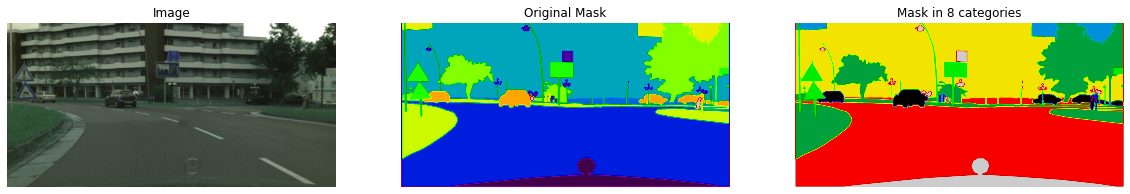

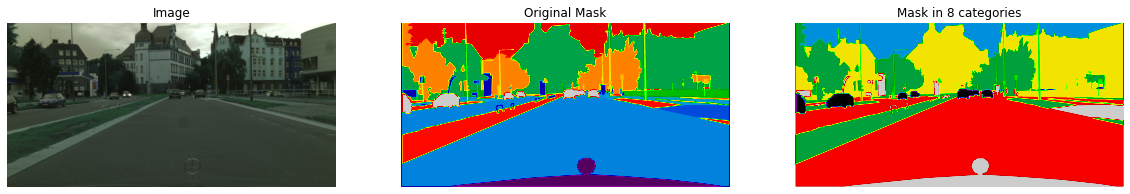

In [23]:
visualize_img_mask30_mask8(train_input_dir, train_masks30_dir, train_target_dir, n=0)

In [28]:
# Function to plot class distribution
def class_dist(mask_path, dataset='Tr'):
    mask_list = os.listdir(mask_path)
    mask_list.sort()

    # Create empty list
    sums = []

    # Load the image data
    for i in tqdm(range(0, len(mask_list)), disable=True):
        mask = cv2.imread(f'{mask_path}/{mask_list[i]}',
                          cv2.IMREAD_GRAYSCALE)
        
        # Return a list of occurence of each unique label value
        (unique, counts) = np.unique(mask, return_counts=True)

        # Store the result in a list of dictionary
        sums.append(dict(zip(unique, counts)))

    # Use a counter
    result_counter = Counter()

    # Iterate over elements in sums
    for elem in sums:
        for key, value in elem.items():
            result_counter[key] += value
    

    categ = {'void': 0, 'flat': 1, 'construction': 2, 
             'object': 3, 'nature': 4, 'sky': 5, 
             'human': 6, 'vehicle': 7}
    colors = ['lightgrey', 'red', 'yellow', 'greenyellow',
                 'forestgreen', 'deepskyblue', 'royalblue', 'black']
    
    # Plot the class distribution
    plt.figure()
    plt.bar(x=categ.keys(), height=result_counter.values(),
            tick_label=list(categ.keys()), 
            color=colors)
    plt.xticks(rotation=90)
    plt.title(dataset +' Class Distribution')
    plt.show()

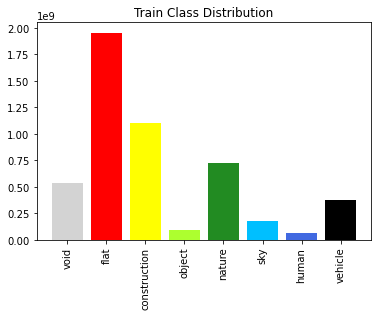

In [29]:
# Call the function
class_dist(train_target_dir, dataset='Train')

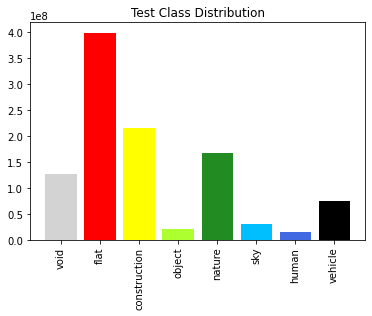

In [30]:
class_dist(test_target_dir, dataset='Test')

#### Read the image

In [31]:
img_height, img_width = 256, 512
img_size = (img_height, img_width)

# Set path
train_input_path = sorted(glob(train_input_dir + '/*.png'))

# Load image from the train dataset
img = load_img(f'{train_input_path[1]}', target_size=img_size)

## Image Augmentation

#### image with Guassian Blur

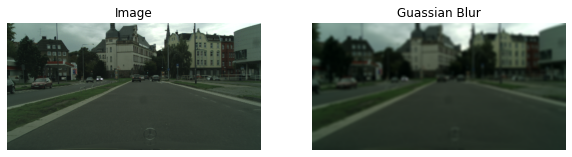

In [32]:
#define the blur transform
blur_transform = iaa.GaussianBlur(sigma=(0, 3.0))
img_blur = blur_transform(image=img_to_array(img))
blur = array_to_img(img_blur)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Guassian Blur')
ax1.imshow(blur, cmap='nipy_spectral')
ax1.axis('off')
plt.show()

#### Image with Brightness

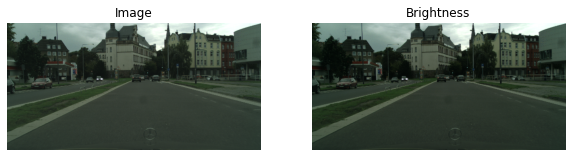

In [33]:
#define the brightness transform
br_transform = iaa.Multiply((0.1,2))
img_br = br_transform(image=img_to_array(img))
br=array_to_img(img_br)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Brightness')
ax1.imshow(br, cmap='nipy_spectral')
ax1.axis('off')
plt.show()

#### Image with Horizontal Flip

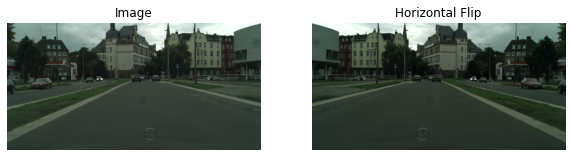

In [34]:
#define the Horizontal flip transform
horizonflip_transform=iaa.Fliplr()
img_hlip = horizonflip_transform(image=img_to_array(img).astype(np.uint8))
hlip=array_to_img(img_hlip)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Horizontal Flip')
ax1.imshow(hlip, cmap='nipy_spectral')
ax1.axis('off')
plt.show()

#### Image with Fog

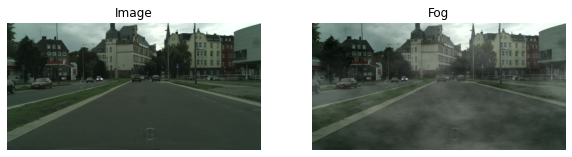

In [35]:
#define the fog transform
fog_transform = iaa.Fog()
img_fog = fog_transform(image=img_to_array(img).astype(np.uint8))
fog=array_to_img(img_fog)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Image')
ax.imshow(img)
ax.axis('off')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Fog')
ax1.imshow(fog, cmap='nipy_spectral')
ax1.axis('off')
plt.show()

### Plot some image with respect to 8 category masks

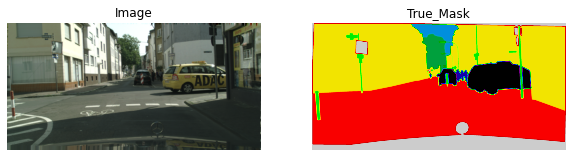

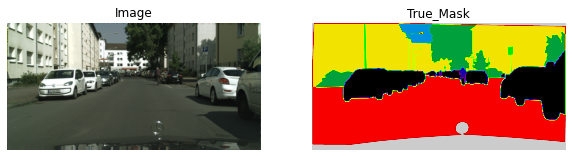

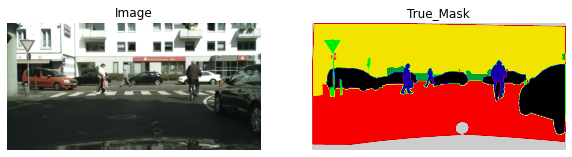

In [29]:
# Load first three images from the test dataset and plot the 8 categorie mask side by side
for i in range(0,3):
    image = img_to_array(load_img(f'{test_input_path[i]}'))/255.
    mask = img_to_array(load_img(f'{test_target_path[i]}', color_mode = "grayscale"))
    mask = np.squeeze(mask)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1)
    ax.set_title('Image')
    ax.imshow(image)
    ax.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('True_Mask')
    ax2.imshow(mask, cmap='nipy_spectral_r')
    ax2.axis('off')